## Mensual

#### Tienda 20

In [27]:
wall_data_store_20 = wall_data[wall_data['Store']==20].iloc[:,[1,2,8,9,10]]
# wall_data_store_20 
wall_data_store_20_promedio_mensual= wall_data_store_20.groupby(['year','month'])[['Weekly_Sales']].mean().reset_index()
wall_data_store_20_promedio_mensual['year_str']=wall_data_store_20_promedio_mensual.year.apply(str)
wall_data_store_20_promedio_mensual['month_str']=wall_data_store_20_promedio_mensual.month.apply(str)
# wall_data_store_20_promedio_mensual.info()
wall_data_store_20_promedio_mensual['year_month'] = wall_data_store_20_promedio_mensual[['year_str','month_str']].apply('-'.join,axis=1)
# wall_data_store_20_promedio_mensual.head()
wall_data_store_20_promedio_mensual['Date']=pd.to_datetime(wall_data_store_20_promedio_mensual['year_month'],format="%Y-%m",yearfirst=True)
wall_data_store_20_promedio_mensual = wall_data_store_20_promedio_mensual.iloc[:,[6,2]]
wall_data_store_20_promedio_mensual.head()

,Date,Weekly_Sales
0,2010-02-01,"2,142,561.77"
1,2010-03-01,"1,994,194.99"
2,2010-04-01,"2,039,378.34"
3,2010-05-01,"2,032,533.96"
4,2010-06-01,"2,092,287.16"


<AxesSubplot:>

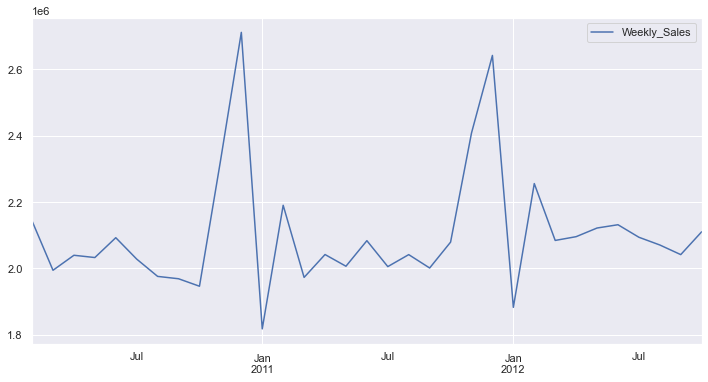

In [28]:
wall_data_store_20_promedio_mensual.set_index('Date',inplace=True)
wall_data_store_20_promedio_mensual = wall_data_store_20_promedio_mensual.rename_axis(index=None, columns = None)
plt.rcParams["figure.figsize"] = (12,6)
wall_data_store_20_promedio_mensual.plot()

In [29]:
adf(wall_data_store_20_promedio_mensual.Weekly_Sales,'Weekly_Sales')

Resultados ADF: ,Weekly_Sales
Test Statistic          -5.57
p-value                  0.00
No Lags Used             0.00
Observation number      32.00
Critical Values (1%)    -3.65
Critical Values (5%)    -2.96
Critical Values (10%)   -2.62
dtype: float64
Los datos son estacionarios


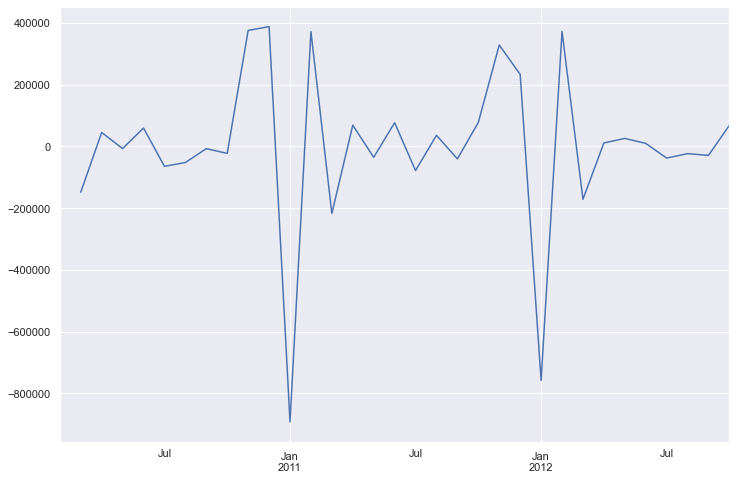

In [30]:
prev_store_20_value = wall_data_store_20_promedio_mensual.Weekly_Sales.shift()
differenced_store_20 = wall_data_store_20_promedio_mensual.Weekly_Sales - prev_store_20_value
plt.rcParams["figure.figsize"] = (12,8)
differenced_store_20.plot();

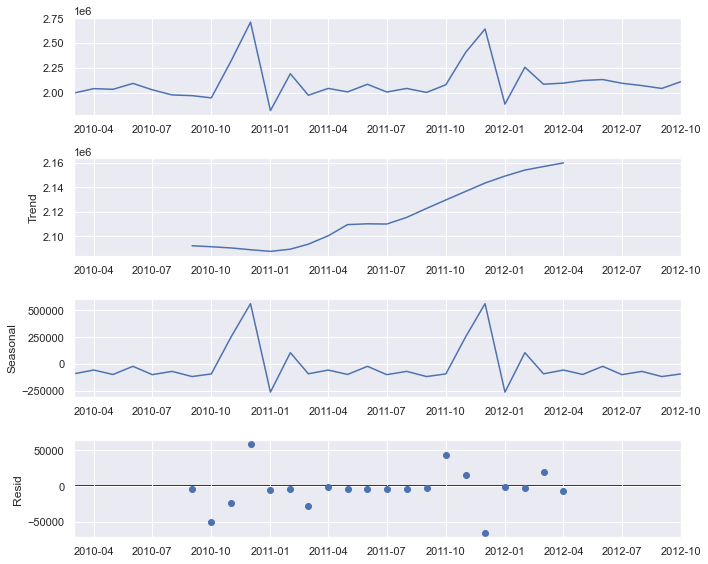

In [31]:
differenced_store_20_dif = seasonal_decompose(wall_data_store_20_promedio_mensual.iloc[1:],model='additive',period = 12)
plt.rcParams["figure.figsize"] = (10,8)
differenced_store_20_dif.plot();

### ARIMA

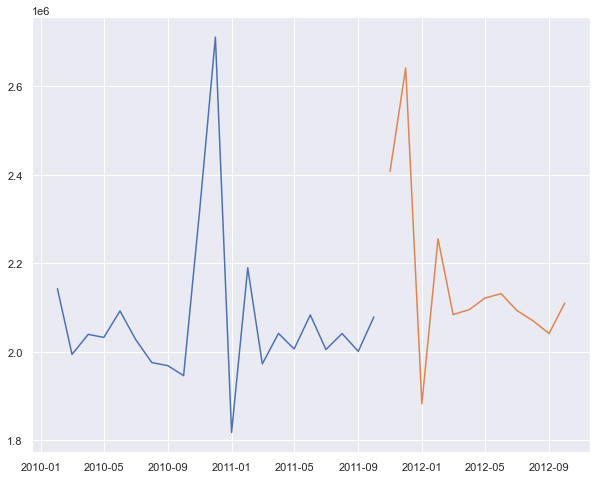

In [45]:
train = wall_data_store_20_promedio_mensual.Weekly_Sales[:len(wall_data_store_20_promedio_mensual.Weekly_Sales)-12]  # primero datos
test = wall_data_store_20_promedio_mensual.Weekly_Sales[len(wall_data_store_20_promedio_mensual.Weekly_Sales)-12:]   # últimos datos
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(train)
plt.plot(test)

In [46]:
# Nunca se debe utilizar toda la información de un dataset, debe ser el dataset de train 
# para el entrenamiento de los modelo.
# El test nunca filtra inforamción al train.
arima_model = pm.auto_arima(train, start_p=0,d=0,start_q=0,max_p=5,max_d=5,max_q=5,
                            start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,m=12,
                            seasonal=True,error_Action='warn',trace=True,test='adf',
                            supress_warnings = True, stepwise=True, random_state=20,
                            n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=224.291, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=228.002, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=228.362, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=224.829, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=226.290, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=226.290, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=226.011, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=226.444, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=225.971, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 0.806 seconds


#### SARIMAX

In [47]:
# D:parametro parte estacional, d:parametro parte no estacional
# from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(train,order=(0,0,0),seasonal_order = (0,1,0,12))     #AIC 380.096; D=1;d=0
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:             Weekly_Sales   No. Observations:                   21
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -111.415
Date:                  Sat, 03 Dec 2022   AIC                            224.829
Time:                          00:18:29   BIC                            225.026
Sample:                      02-01-2010   HQIC                           224.403
                           - 10-01-2011                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.978e+09   4.81e+08      4.117      0.000    1.04e+09    2.92e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.61   Prob(JB):                         0.48
Heteroskedasticity (H):               8.48   Skew:                             0.99
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
arima_result.model_orders
# r2. si no hay una cte (ar,phi_0) en el modelo. este es negativo.

{'trend': 0,
 'exog': 0,
 'ar': 0,
 'ma': 0,
 'seasonal_ar': 0,
 'seasonal_ma': 0,
 'reduced_ar': 0,
 'reduced_ma': 0,
 'exog_variance': 0,
 'measurement_variance': 0,
 'variance': 1}

In [49]:
arima_pred = arima_result.predict(start=len(train),end=len(wall_data_store_20_promedio_mensual)-1,type='levels').rename('ARIMA Predictions')
arima_pred
# el autoarima no tiene una cte 

2011-11-01   2,322,193.72
2011-12-01   2,710,758.33
2012-01-01   1,817,672.07
2012-02-01   2,189,938.99
2012-03-01   1,972,684.31
2012-04-01   2,041,621.16
2012-05-01   2,006,359.05
2012-06-01   2,083,331.58
2012-07-01   2,005,234.94
2012-08-01   2,041,298.79
2012-09-01   2,001,049.19
2012-10-01   2,078,938.47
Freq: MS, Name: ARIMA Predictions, dtype: float64

<AxesSubplot:>

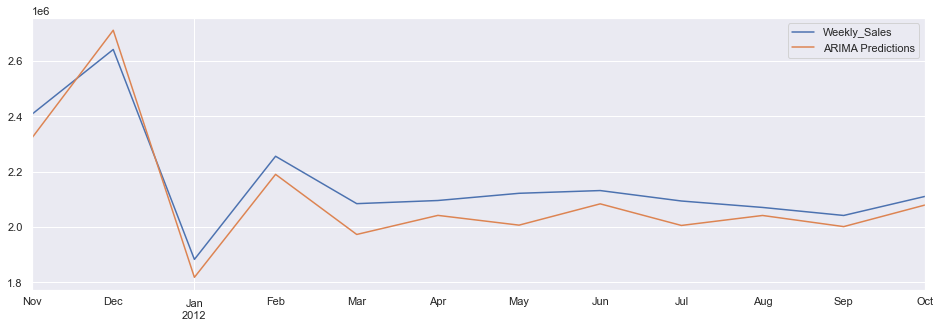

In [50]:
test.plot(figsize=(16,5),legend=True)
arima_pred.plot(legend=True)

Accuracy test(R2):  85.08172077109136
Mean Absolute Error:  66852.11704166663
Mean Square Error:  5224463219.885597
Root Mean Square Error:  72280.44839294784
Mean Absolute Percentage Error:  0.030986461666270827


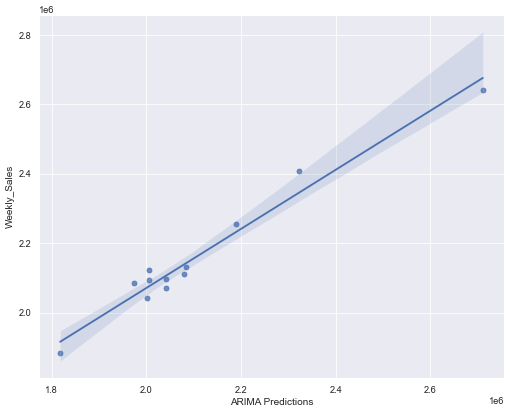

In [51]:
print('Accuracy test(R2): ', metrics.r2_score(test,arima_pred)*100)
performance(test,arima_pred)


#### Probar diferentes tiendas

In [104]:
def test(df,x,y):
    print('#-------------------------- Prueba ADF ------------------------------------ #')
    adf(df.Weekly_Sales,'Weekly_Sales')
    print('#-------------------------- Prueba ADF ------------------------------------ #')
    
    # Grafica del conjunto de datos de la tieda
    df.plot()
    
    # Estacionalidad, tendencia y residuo del conjutno de datos
    estacionalidad(df)    
    # Train y Test
    train, test = tra_tes(df)
    print('Train:',len(train),'Test: ',len(test))
    plt.plot(train)
    plt.plot(test)
     
    #D = x  indicar si es o no estacional 1 o 0
    #d = y  indicar si es o no estacional 1 o 0
    print('#-------------------------- Autoarima ---------------------------- #')
    arima_model = pm.auto_arima(train, start_p=0,d=y,start_q=0,max_p=5,max_d=5,max_q=5,
                                start_P=0,D=x,start_Q=0,max_P=5,max_D=5,max_Q=5,m=52,
                                seasonal=True,error_Action='warn',trace=True,test='adf',
                                supress_warnings = True, stepwise=True, random_state=20,
                                n_fits = 50)


#-------------------------- Prueba ADF ------------------------------------ #
Resultados ADF: ,Weekly_Sales
Test Statistic           -2.74
p-value                   0.07
No Lags Used              6.00
Observation number      136.00
Critical Values (1%)     -3.48
Critical Values (5%)     -2.88
Critical Values (10%)    -2.58
dtype: float64
Los datos no son estacionarios
#-------------------------- Prueba ADF ------------------------------------ #
Train: 95 Test:  48
#-------------------------- Autoarima ---------------------------- #
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2659.578, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2657.718, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2655.400, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3038.834, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=2658.332, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=2657.337, Time=0.42 sec
 ARIMA(0,0,1)(0,0

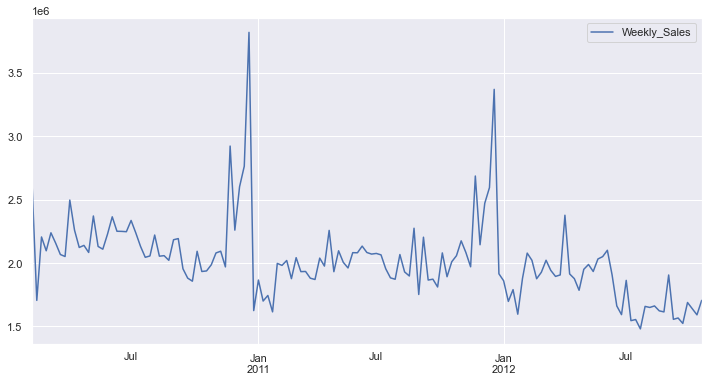

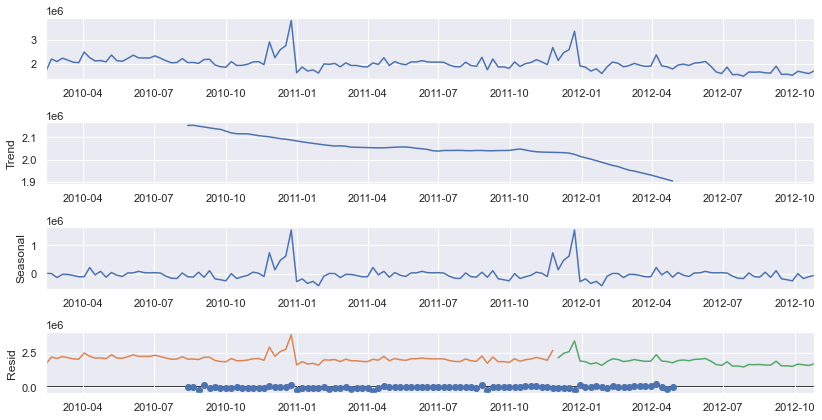

In [105]:
test(s_14,0,0)

In [106]:
# D:parametro parte estacional, d:parametro parte no estacional
arima_model = SARIMAX(train,order=(2,0,1),seasonal_order = (1,0,0,52)) 
arima_result = arima_model.fit() 
arima_result.summary()


C:\Users\Rodrigo Piña\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Rodrigo Piña\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                   95
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 52)   Log Likelihood               -1325.775
Date:                             Tue, 06 Dec 2022   AIC                           2661.550
Time:                                     16:34:57   BIC                           2674.319
Sample:                                 02-05-2010   HQIC                          2666.709
                                      - 11-25-2011                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1940      0.114     10.491      0.000       0.971       1.417
ar.L2         -0.1942      0.114     -1.710      0.087      -0.417       0.028
ma.L1         -0.9487      0.077    -12.342      0.000      -1.099      -0.798
ar.S.L52       0.5185      0.064      8.053      0.000       0.392       0.645
sigma2      8.349e+10   4.94e-13   1.69e+23      0.000    8.35e+10    8.35e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               396.14
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.47
Prob(H) (two-sided):                  0.32   Kurtosis:                        12.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.55e+38. Standard errors may be unstable.
"""

In [107]:
arima_result.model_orders

{'trend': 0,
 'exog': 0,
 'ar': 2,
 'ma': 1,
 'seasonal_ar': 52,
 'seasonal_ma': 0,
 'reduced_ar': 54,
 'reduced_ma': 1,
 'exog_variance': 0,
 'measurement_variance': 0,
 'variance': 1}

In [108]:
arima_pred = arima_result.predict(start= len(train),end=len(s_14)-1,type='levels').rename('ARIMA Predictions')
arima_pred.head(8)

2011-12-02   2,157,212.57
2011-12-09   2,298,648.20
2011-12-16   2,375,730.51
2011-12-23   2,921,666.43
2011-12-30   1,783,197.03
2012-01-06   1,907,970.50
2012-01-13   1,821,927.14
2012-01-20   1,844,640.67
Freq: W-FRI, Name: ARIMA Predictions, dtype: float64

In [109]:
test.plot(figsize=(16,5),legend=True)
arima_pred.plot(legend=True)

AttributeError: 'function' object has no attribute 'plot'

In [103]:
print('Accuracy test(R2): ', metrics.r2_score(test,arima_pred)*100)
performance(test,arima_pred)

TypeError: Expected sequence or array-like, got <class 'function'>